# Lets check the Multi-dimensional Poverty Index in the World

## Importing Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd
import dabl
import pandas_profiling as profile

# for data visualizations
import plotly
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for interactivity
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Reading the Dataset

In [40]:
# lets read the dataset
country = pd.read_csv('MPI_national.csv',engine='python')

# lets check the shape of the dataset
country.shape

(102, 8)

In [3]:
# lets check the head of the dataset
country.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9


In [28]:
# lets check the tail of the data
country.tail()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2
101,SSD,South Sudan,0.459,82.5,55.7,0.591,94.00,62.8


In [5]:
# lets check the sample of the data
country.sample(3)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
62,YEM,Yemen,0.080,19.0,42.1,0.304,57.72,52.7
20,JAM,Jamaica,0.004,1.1,40.0,0.010,2.49,38.7
47,DOM,Dominican Republic,0.029,7.9,37.2,0.048,11.69,41.0


## Lets Inspect the Data

In [6]:
# lets check the different countries present in the data
country['Country'].nunique()

102

In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ISO                               102 non-null object
Country                           102 non-null object
MPI Urban                         102 non-null float64
Headcount Ratio Urban             102 non-null float64
Intensity of Deprivation Urban    102 non-null float64
MPI Rural                         102 non-null float64
Headcount Ratio Rural             102 non-null float64
Intensity of Deprivation Rural    102 non-null float64
dtypes: float64(6), object(2)
memory usage: 6.5+ KB


In [8]:
country.dtypes

ISO                                object
Country                            object
MPI Urban                         float64
Headcount Ratio Urban             float64
Intensity of Deprivation Urban    float64
MPI Rural                         float64
Headcount Ratio Rural             float64
Intensity of Deprivation Rural    float64
dtype: object

In [74]:
country.isnull().sum().sum()

0

## Inferential Statistics of the data

In [10]:
x = country.cov()
x.style.bar(color = ['red', 'green'], align = 'mid')

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
MPI Urban,0.00877833,1.7262,0.423465,0.0173825,2.76544,0.727519
Headcount Ratio Urban,1.7262,342.193,83.9886,3.49728,562.254,145.724
Intensity of Deprivation Urban,0.423465,83.9886,26.3775,0.922482,150.171,40.7985
MPI Rural,0.0173825,3.49728,0.922482,0.0404848,6.60565,1.70797
Headcount Ratio Rural,2.76544,562.254,150.171,6.60565,1106.94,274.867
Intensity of Deprivation Rural,0.727519,145.724,40.7985,1.70797,274.867,77.1444


In [11]:
x = country.corr()
x.style.bar(color = ['red', 'gold'], align = 'mid')

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
MPI Urban,1,0.995981,0.880024,0.922065,0.887147,0.884069
Headcount Ratio Urban,0.995981,1,0.884032,0.939615,0.913555,0.896901
Intensity of Deprivation Urban,0.880024,0.884032,1,0.892678,0.878833,0.904428
MPI Rural,0.922065,0.939615,0.892678,1,0.98675,0.966458
Headcount Ratio Rural,0.887147,0.913555,0.878833,0.98675,1,0.940608
Intensity of Deprivation Rural,0.884069,0.896901,0.904428,0.966458,0.940608,1


In [12]:
x = country.describe()
x.style.bar(color = ['lightblue'], align = 'mid')

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
count,102,102,102,102,102,102
mean,0.0783431,16.8098,41.6784,0.214676,40.0362,46.8245
std,0.0936927,18.4984,5.13591,0.201208,33.2707,8.78319
min,0,0,33.3,0,0.09,33.3
25%,0.00725,1.95,37.2,0.025,6.745,40.225
50%,0.0345,8.4,41.55,0.16,36.055,44.8
75%,0.12575,27.575,45.675,0.3845,70.13,53.425
max,0.459,82.5,55.7,0.669,96.92,69.5


In [13]:
# lets check the columns in the subnational and National Data

print("Columns in the National Data :\n\n", country.columns, '\n')

Columns in the National Data :

 Index(['ISO', 'Country', 'MPI Urban', 'Headcount Ratio Urban',
       'Intensity of Deprivation Urban', 'MPI Rural', 'Headcount Ratio Rural',
       'Intensity of Deprivation Rural'],
      dtype='object') 



## Data Visualizations

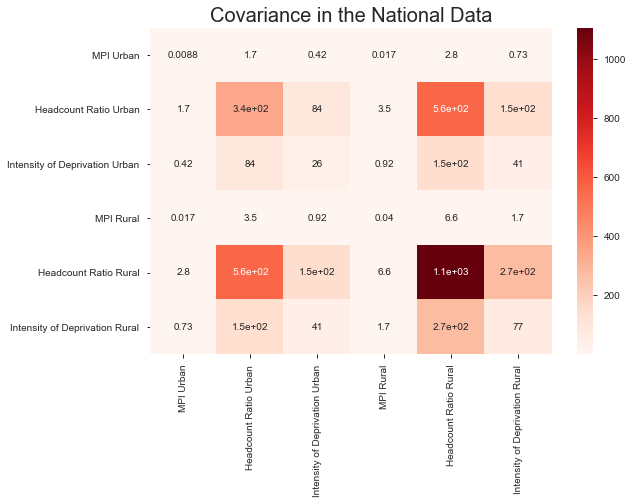

In [14]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(country.cov(),
            cmap = 'Reds',
            annot = True)
plt.title('Covariance in the National Data', fontsize = 20)
plt.show()

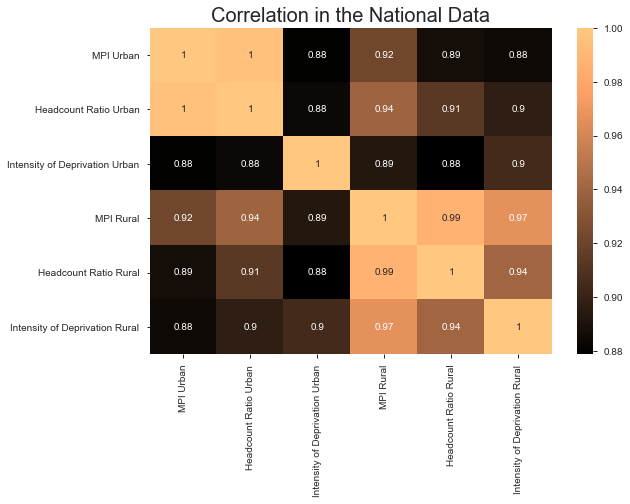

In [15]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(country.corr(),
            cmap = 'copper',
            annot = True)
plt.title('Correlation in the National Data', fontsize = 20)
plt.show()

In [16]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

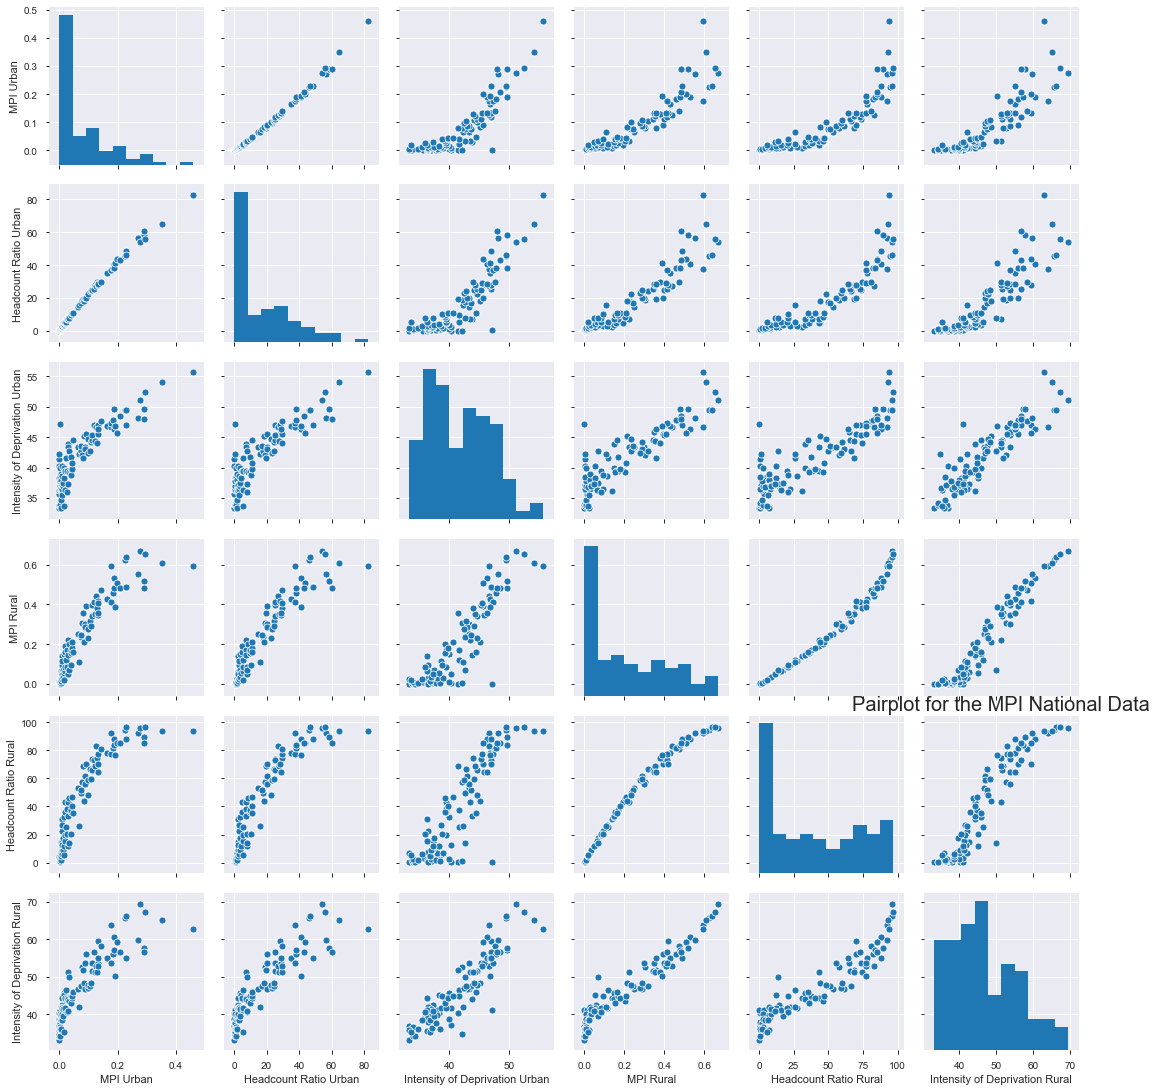

In [17]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.pairplot(country, palette = 'green')
plt.title('Pairplot for the MPI National Data', fontsize = 20)
plt.show()

## Variable Analysis

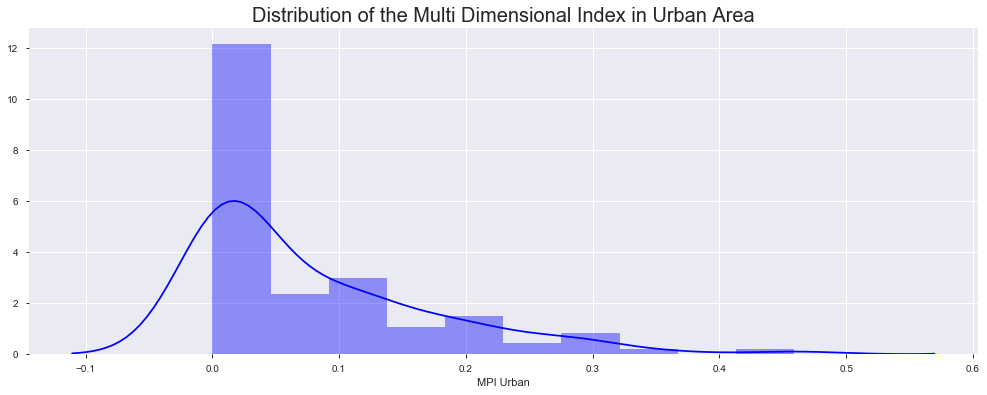

In [42]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['MPI Urban'],
             color = 'blue')
plt.title('Distribution of the Multi Dimensional Index in Urban Area', fontsize = 20)
plt.show()

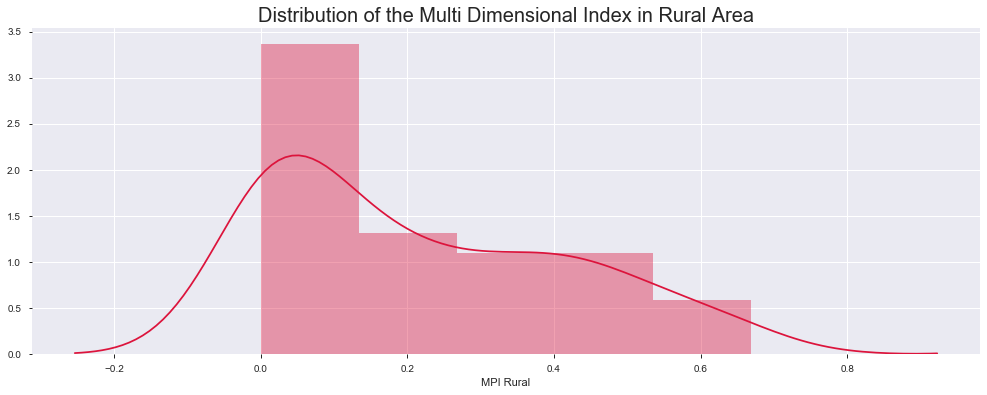

In [43]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['MPI Rural'],
             color = 'crimson')
plt.title('Distribution of the Multi Dimensional Index in Rural Area', fontsize = 20)
plt.show()

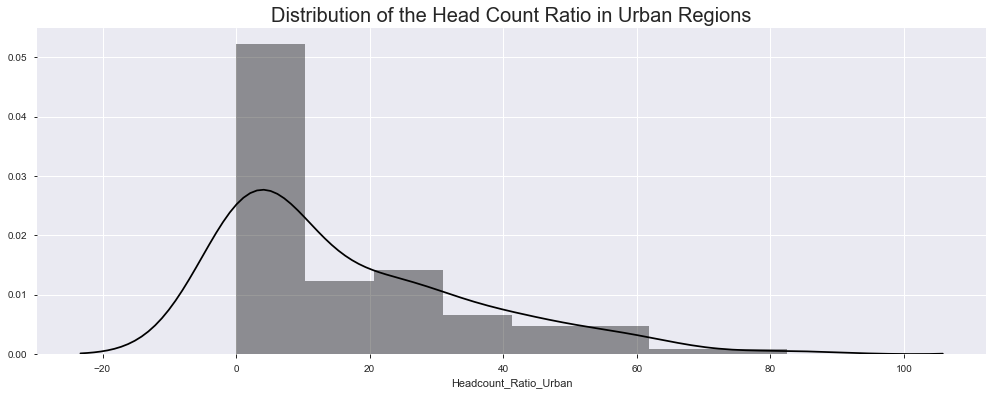

In [25]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['Headcount_Ratio_Urban'],
             color = 'black')
plt.title('Distribution of the Head Count Ratio in Urban Regions', fontsize = 20)
plt.show()

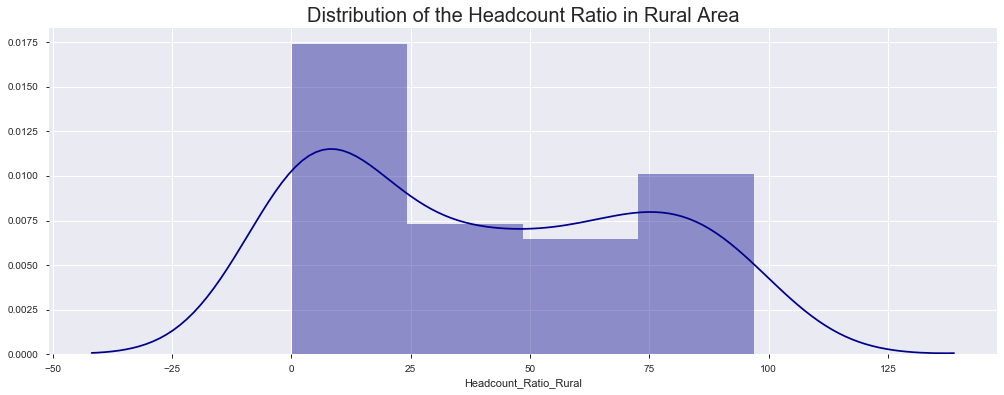

In [26]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['Headcount_Ratio_Rural'],
             color = 'darkblue')
plt.title('Distribution of the Headcount Ratio in Rural Area', fontsize = 20)
plt.show()

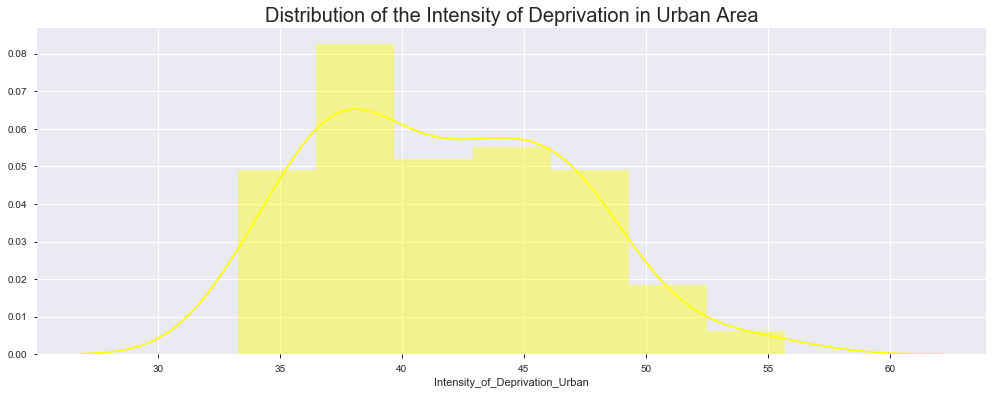

In [29]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['Intensity_of_Deprivation_Urban'],
             color = 'yellow')
plt.title('Distribution of the Intensity of Deprivation in Urban Area', fontsize = 20)
plt.show()

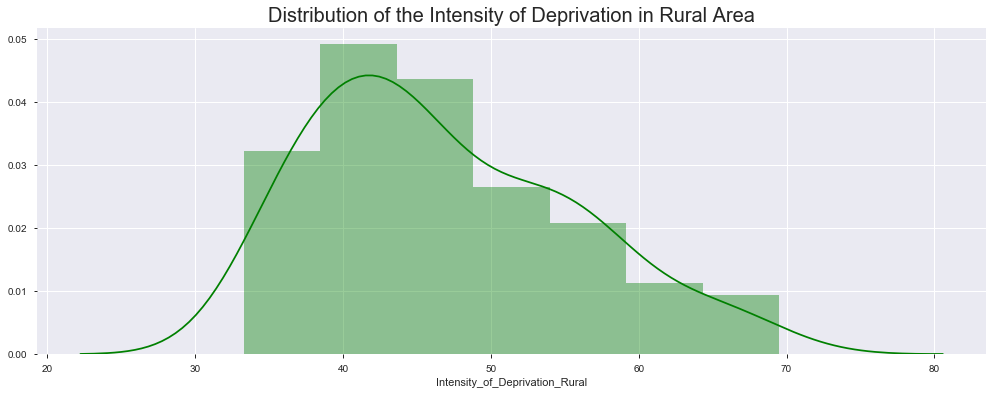

In [28]:
# lets check the univariate analysis

plt.rcParams['figure.figsize'] = (17, 6)
sns.distplot(country['Intensity_of_Deprivation_Rural'],
             color = 'green')
plt.title('Distribution of the Intensity of Deprivation in Rural Area', fontsize = 20)
plt.show()

## Interactive Analysis


In [30]:
country.columns

Index(['ISO', 'Country', 'MPI_Urban', 'Headcount_Ratio_Urban',
       'Intensity_of_Deprivation_Urban', 'MPI_Rural', 'Headcount_Ratio_Rural',
       'Intensity_of_Deprivation_Rural'],
      dtype='object')

In [75]:
@interact
def check_poverty(column = ['Headcount Ratio Urban'], x = 50.0):
    c = country[['Country','Headcount Ratio Urban']]
    c = c.sort_values(by = 'Headcount Ratio Urban', ascending = False)
    return c.loc[c[column] > x]
    

interactive(children=(Dropdown(description='column', options=('Headcount Ratio Urban',), value='Headcount Rati…

In [45]:
@interact
def check_poverty(column = ['Headcount Ratio Rural'], x = 90.0):
    c = country[['Country','Headcount Ratio Rural']]
    return c.loc[c[column] > x]
    

interactive(children=(Dropdown(description='column', options=('Headcount Ratio Rural',), value='Headcount Rati…

In [46]:
@interact
def check_poverty(column = ['MPI Urban'], x = 0.2):
    c = country[['Country','MPI Urban']]
    return c.loc[c[column] > x]
    

interactive(children=(Dropdown(description='column', options=('MPI Urban',), value='MPI Urban'), FloatSlider(v…

In [47]:
@interact
def check_poverty(column = ['MPI Rural'], x = 0.5):
    c = country[['Country','MPI Rural']]
    return c.loc[c[column] > x]
    

interactive(children=(Dropdown(description='column', options=('MPI Rural',), value='MPI Rural'), FloatSlider(v…

In [49]:
@interact
def check_poverty(column = 'Intensity of Deprivation Urban', x = 50.0):
    c = country[['Country','Intensity of Deprivation Urban']]
    return c.loc[c[column] > x]
    

interactive(children=(Text(value='Intensity of Deprivation Urban', description='column'), FloatSlider(value=50…

In [50]:
@interact
def check_poverty(column = 'Intensity of Deprivation Rural', x = 60.0):
    c = country[['Country','Intensity of Deprivation Rural']]
    return c.loc[c[column] > x]
  

interactive(children=(Text(value='Intensity of Deprivation Rural', description='column'), FloatSlider(value=60…

In [51]:
@interact
def check(column1 = list(country.select_dtypes('number').columns),
          column2 = list(country.select_dtypes('number').columns[1:])):
    print(f"Correlation is :", country[column1].corr(country[column2]))

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [52]:
@interact
def check(column1 = list(country.select_dtypes('number').columns),
          column2 = list(country.select_dtypes('number').columns[1:])):
    print(f"Covariance is :", country[column1].cov(country[column2]))

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [53]:
@interact
def check(column1 = list(country.select_dtypes('number').columns)):
    print(f"The Maximum Value is :", country[column1].max())

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [54]:
@interact
def check(column1 = list(country.select_dtypes('number').columns)):
    print(f" The Minimum Value is :", country[column1].min())

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [55]:
@interact
def check(column1 = list(country.select_dtypes('number').columns)):
    print(f"The Average Value is :", country[column1].mean())

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [56]:
@interact
def check(column1 = list(country.select_dtypes('number').columns)):
    print(f"The Standard Deviation is :", country[column1].std())

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

## Interactive Visualization

In [57]:
@interact_manual
def plot_scatter(column1 = list(country.select_dtypes('number').columns),
                 column2 = list(country.select_dtypes('number').columns[1:]),
                 color = ['red','black','green','blue']):
    sns.scatterplot(country[column1], country[column2], color = color)
    plt.show()
    

interactive(children=(Dropdown(description='column1', options=('MPI Urban', 'Headcount Ratio Urban', 'Intensit…

In [76]:
plt.rcParams['figure.figsize'] = (18, 6)
@interact_manual
def plot_bar(column1 = list(country.select_dtypes('object').columns),
             column2 = list(country.select_dtypes('number').columns)):
    sns.barplot(country[column1], country[column2])
    plt.xticks(rotation = 90)

interactive(children=(Dropdown(description='column1', options=('ISO', 'Country'), value='ISO'), Dropdown(descr…

# Multi-dimensional Index on the  Sub National Level

In [59]:
# lets read another dataset
sub = pd.read_csv('MPI_subnational.csv')

# lets check the shape of the dataset
sub.shape

(984, 8)

In [60]:
# lets check the head of the dataset
sub.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


In [61]:
# lets check the tail of the subnational data
sub.tail()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43.7,44.1
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38.9,44.7
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53.4,44.5
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38.2,42.8
983,ZWE,Zimbabwe,Midlands,Sub-Saharan Africa,0.152,0.176,40.5,43.5


In [62]:
# lets take a look at the sample of the data
sub.sample(3)

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
504,LSO,Lesotho,Mafeteng,Sub-Saharan Africa,0.140,0.131,31.3,41.9
850,SYR,Syrian Arab Republic,Rural Damascus,Arab States,0.016,0.009,2.2,40.2
776,SDN,Sudan,Kassala,Arab States,0.287,0.362,66.1,54.8


In [63]:
# lets check the info of the sub national data
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
ISO country code                     984 non-null object
Country                              984 non-null object
Sub-national region                  984 non-null object
World region                         984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(4), object(4)
memory usage: 61.6+ KB


In [64]:
# lets check the data types of teh subnational data
sub.dtypes

ISO country code                      object
Country                               object
Sub-national region                   object
World region                          object
MPI National                         float64
MPI Regional                         float64
Headcount Ratio Regional             float64
Intensity of deprivation Regional    float64
dtype: object

In [65]:
# lets check the null values present in the data
sub.isnull().sum()

ISO country code                     0
Country                              0
Sub-national region                  0
World region                         0
MPI National                         0
MPI Regional                         0
Headcount Ratio Regional             0
Intensity of deprivation Regional    1
dtype: int64

In [66]:
# we can see that there is a null value present in the Intensity of Deprivation Regional
# so lets impute the missing value with 0

sub['Intensity of deprivation Regional'] = sub['Intensity of deprivation Regional'].fillna(0)

# lets check again if there is any null value present
sub.isnull().sum().sum()

0

In [67]:
# lets check the basic statistiics of the data
x = sub.describe()
x.style.bar(color = 'lightgreen', align = 'mid')

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
count,984,984,984,984
mean,0.204107,0.21133,40.1845,47.133
std,0.160248,0.183621,29.9814,8.18255
min,0.006,0,0,0
25%,0.066,0.053,12.475,41.4
50%,0.174,0.155,33.95,45.6
75%,0.303,0.3415,66.725,51.9
max,0.605,0.744,99,75.9


In [68]:
# lets check the correlation of the data
x = sub.corr()
x.style.bar(color = 'orange', align = 'mid')

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
MPI National,1,0.859133,0.85559,0.805255
MPI Regional,0.859133,1,0.983978,0.934706
Headcount Ratio Regional,0.85559,0.983978,1,0.894648
Intensity of deprivation Regional,0.805255,0.934706,0.894648,1


In [69]:
# lets check the correlation of the data
x = sub.cov()
x.style.bar(color = 'violet', align = 'mid')

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
MPI National,0.0256793,0.0252798,4.11064,1.05588
MPI Regional,0.0252798,0.0337167,5.41701,1.40439
Headcount Ratio Regional,4.11064,5.41701,898.885,219.479
Intensity of deprivation Regional,1.05588,1.40439,219.479,66.9542


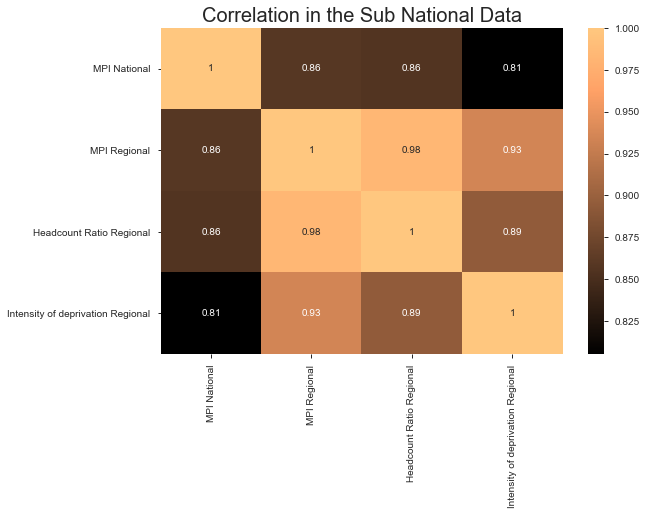

In [70]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(sub.corr(),
            cmap = 'copper',
            annot = True)
plt.title('Correlation in the Sub National Data', fontsize = 20)
plt.show()

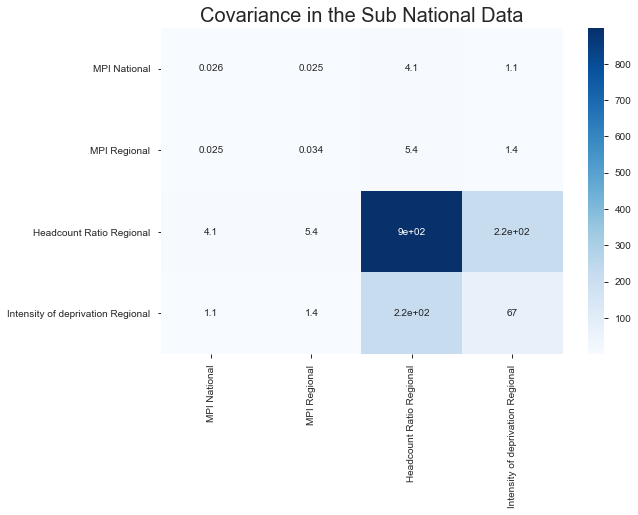

In [58]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(sub.cov(),
            cmap = 'Blues',
            annot = True)
plt.title('Covariance in the Sub National Data', fontsize = 20)
plt.show()

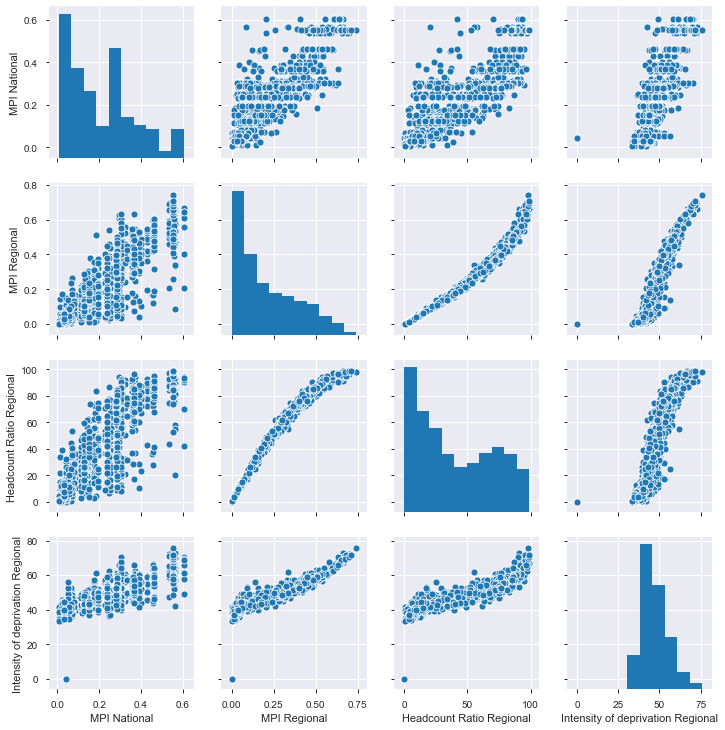

In [59]:
# lets check the pairplot of the subnational data

sns.pairplot(sub)

In [60]:
# lets check the profile of teh sub national data
profile.ProfileReport(sub)

In [61]:
# lets check the columns in the subnational and National Data
print("Columns in the Sub National Data :\n\n", sub.columns)

Columns in the Sub National Data :

 Index(['ISO_country_code', 'Country', 'Sub-national_region', 'World_region',
       'MPI_National', 'MPI_Regional', 'Headcount_Ratio_Regional',
       'Intensity_of_deprivation_Regional'],
      dtype='object')


In [72]:
s = sub[['World region','Country','MPI National']]
s = s.groupby(['World region'])
s = s.agg('mean')
s = s.sort_values(by = 'MPI National', ascending = False)
s.style.bar(color = ['silver'], align = 'mid')

,MPI National
World region,
Sub-Saharan Africa,0.33203
South Asia,0.209049
East Asia and the Pacific,0.124328
Arab States,0.110783
Latin America and Caribbean,0.0542706
Europe and Central Asia,0.0289091


In [73]:
s = sub[['World region','MPI Regional']]
s = s.groupby(['World region'])
s = s.agg('mean')
s = s.sort_values(by = 'MPI Regional', ascending = False)
s.style.bar(color = 'gold', align = 'mid')

,MPI Regional
World region,
Sub-Saharan Africa,0.337128
South Asia,0.21963
East Asia and the Pacific,0.136266
Arab States,0.115287
Latin America and Caribbean,0.0636651
Europe and Central Asia,0.0252727


In [64]:
s = sub[['World_region','Headcount_Ratio_Regional']]
s = s.groupby(['World_region'])
s = s.agg('mean')
s = s.sort_values(by = 'Headcount_Ratio_Regional', ascending = False)
s.style.bar(color = 'aqua', align = 'mid')

,Headcount_Ratio_Regional
World_region,
Sub-Saharan Africa,61.5206
South Asia,44.1185
East Asia and the Pacific,28.2945
Arab States,23.107
Latin America and Caribbean,14.233
Europe and Central Asia,6.42727


In [65]:
s = sub[['World_region','Intensity of deprivation Regional']]
s = s.groupby(['World_region'])
s = s.agg('mean')
s = s.sort_values(by = 'Intensity_of_deprivation_Regional', ascending = False)
s.style.bar(color = 'lightgreen', align = 'mid')

,Intensity_of_deprivation_Regional
World_region,
Sub-Saharan Africa,51.8703
South Asia,47.6395
East Asia and the Pacific,45.6016
Arab States,42.6539
Latin America and Caribbean,41.3482
Europe and Central Asia,37.0818


## Data Visualizations

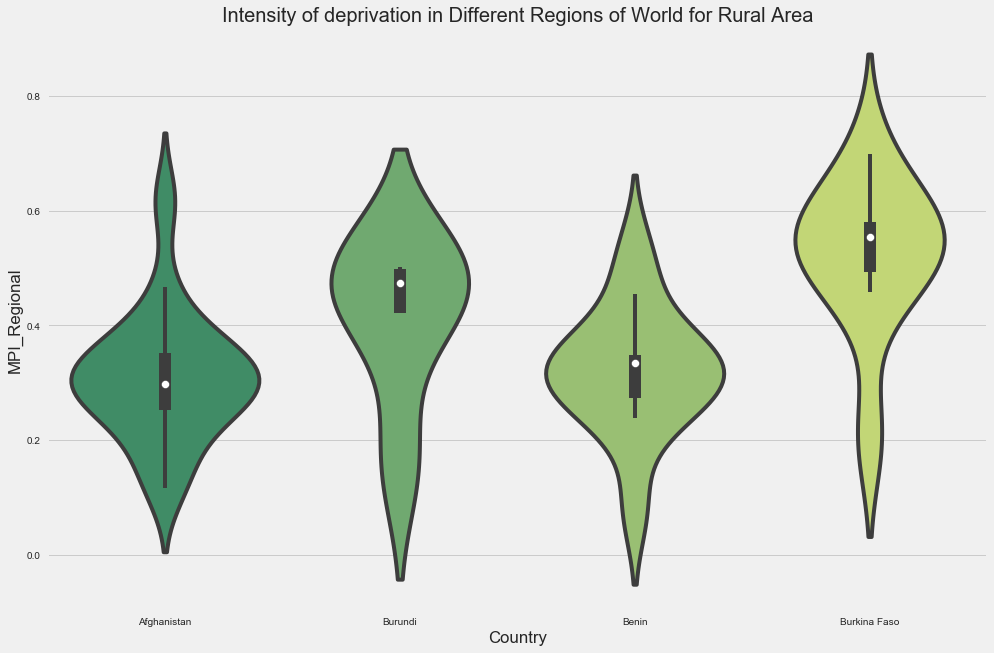

In [66]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.violinplot(sub['Country'][:60],
              sub['MPI_Regional'],
               
              palette = 'summer')
plt.title('Intensity of deprivation in Different Regions of World for Rural Area',
          fontsize = 20)
plt.show()

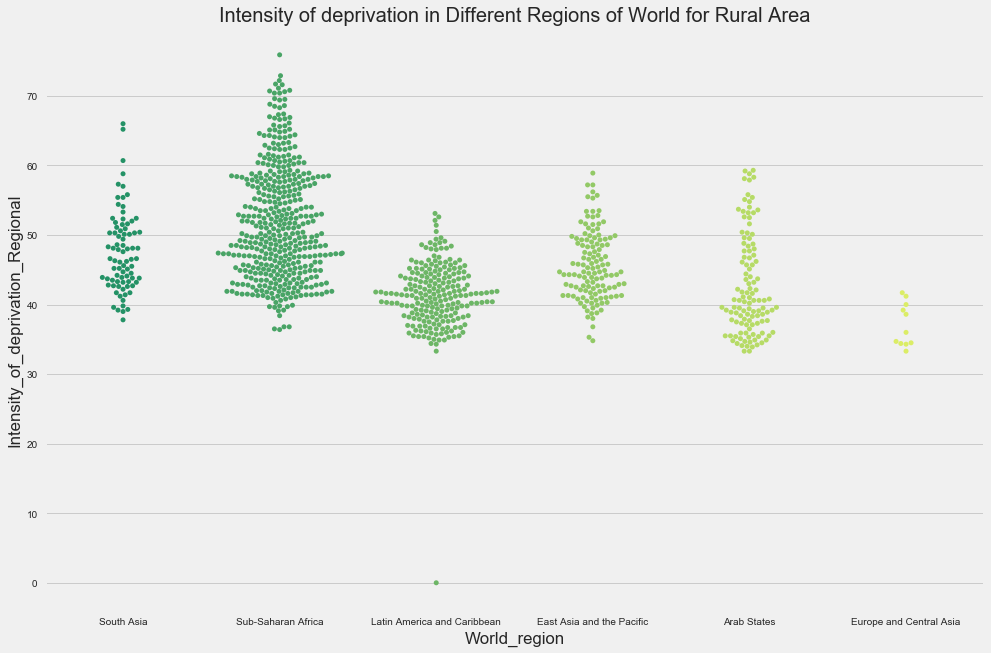

In [67]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.swarmplot(sub['World_region'],
              sub['Intensity_of_deprivation_Regional'],
              palette = 'summer')
plt.title('Intensity of deprivation in Different Regions of World for Rural Area',
          fontsize = 20)
plt.show()

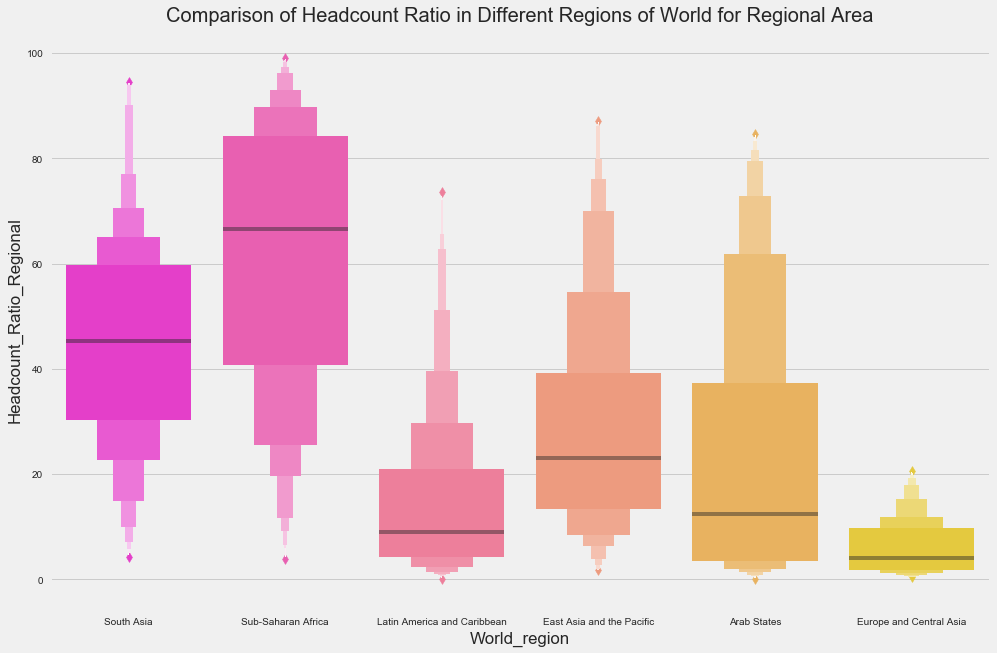

In [68]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.boxenplot(sub['World_region'],
              sub['Headcount_Ratio_Regional'],
              palette = 'spring')
plt.title('Comparison of Headcount Ratio in Different Regions of World for Regional Area',
          fontsize = 20)
plt.show()

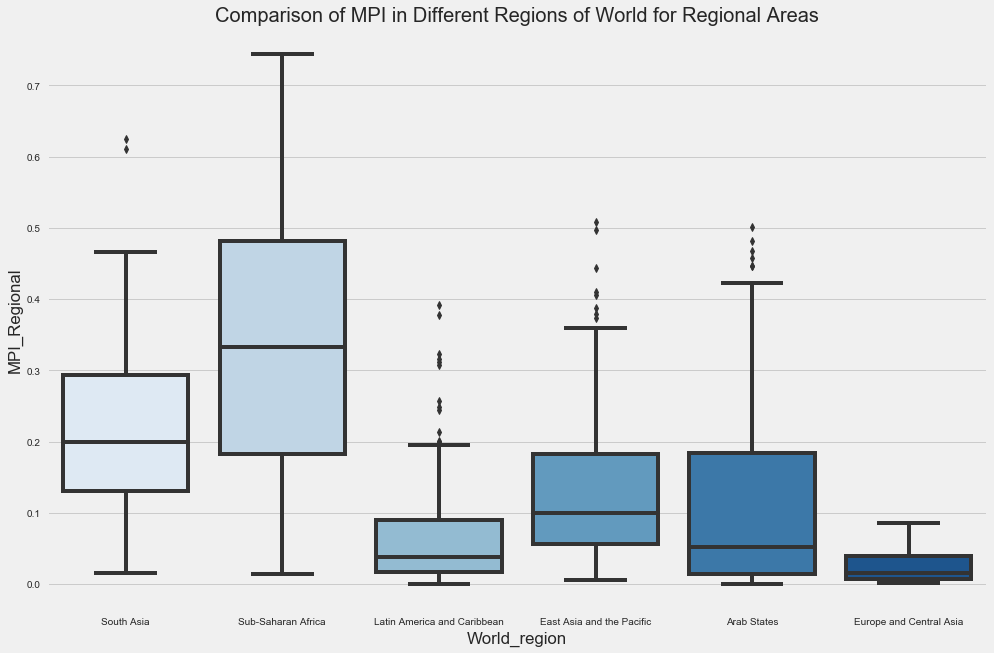

In [69]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.boxplot(sub['World_region'],
            sub['MPI_Regional'],
            palette = 'Blues')
plt.title('Comparison of MPI in Different Regions of World for Regional Areas', fontsize = 20)
plt.show()

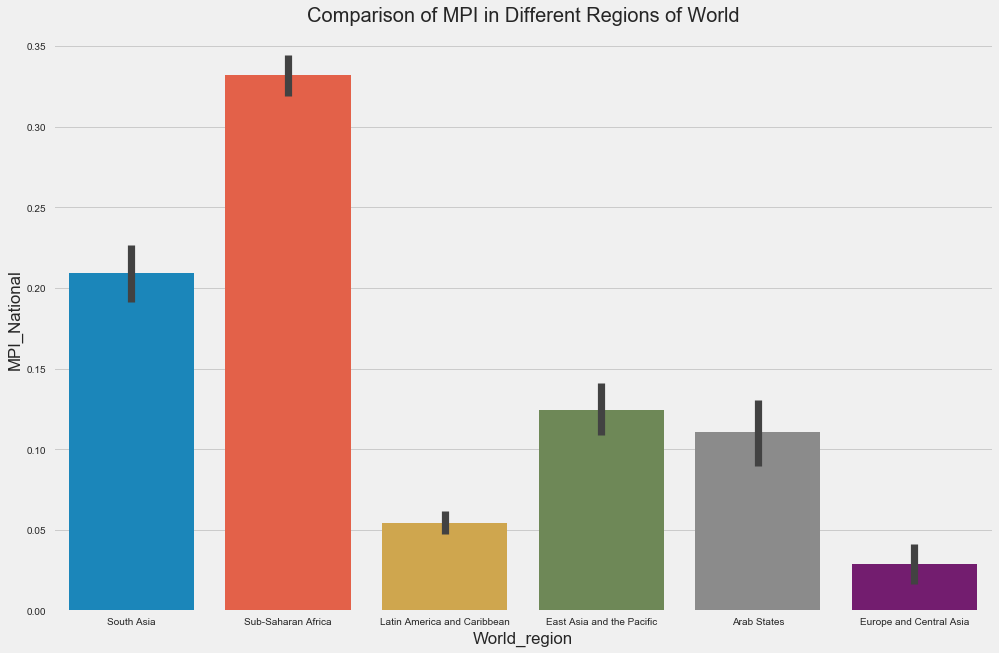

In [70]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.barplot(sub['World_region'], sub['MPI_National'])
plt.title('Comparison of MPI in Different Regions of World', fontsize = 20)
plt.show()

## Interactive Analysis

In [71]:
@interact
def check(column = ['Headcount_Ratio_Regional', 'Intensity_of_deprivation_Regional'], x = 95.0):
    return sub.loc[sub[column] > x]

interactive(children=(Dropdown(description='column', options=('Headcount_Ratio_Regional', 'Intensity_of_depriv…

In [72]:
@interact
def check(column = ['MPI_National','MPI_Regional'], x = 0.6):
    return sub.loc[sub[column] > x]

interactive(children=(Dropdown(description='column', options=('MPI_National', 'MPI_Regional'), value='MPI_Nati…

In [73]:
@interact_manual
def plot_bar(column1 = ['World_region'],
             column2 = list(sub.select_dtypes('number').columns),
             colors = ['spring', 'copper' 'Reds', 'Blues','Greens']):
    sns.boxplot(sub[column1], sub[column2], palette = colors)
    plt.xticks(rotation = 90)

interactive(children=(Dropdown(description='column1', options=('World_region',), value='World_region'), Dropdo…

In [74]:
@interact_manual
def plot_bar(column1 = list(sub.select_dtypes('object').columns),
             column2 = list(sub.select_dtypes('number').columns)):
    sns.barplot(sub[column1][:100], sub[column2])
    plt.xticks(rotation = 90)

interactive(children=(Dropdown(description='column1', options=('ISO_country_code', 'Country', 'Sub-national_re…

In [75]:
@interact_manual
def plot_scatter(column1 = list(sub.select_dtypes('number').columns),
                 column2 = list(sub.select_dtypes('number').columns[1:]),
                 color = ['red','black','green','blue']):
    sns.scatterplot(sub[column1], sub[column2], color = color)
    plt.show()
    

interactive(children=(Dropdown(description='column1', options=('MPI_National', 'MPI_Regional', 'Headcount_Rati…